# Derwent Strength Index

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime, timedelta

### Uploading CSV file

Columns extracted:<br>
DWPI Accession Number<br>
Publication Number<br>
DWPI Family Members<br>
Publication Date<br>
Priority Date - Earliest<br>
DWPI Class<br>
Count of Citing Patents - DPCI<br>

In [11]:
#file = input('Enter the file name :')
#file = file + '.csv'
df = pd.read_csv('DSI_python.csv')

### Initial look at a file

In [12]:
df.head().T

,0,1,2,3,4
DWPI Accession Number,2001330470,2001345882,2001357757,2001389746,2001466546
Publication Number,US7189004B2,EP1093208B1,EP1093943A3,US7199507B2,DE20021290U1
DWPI Family Members,EP1091469A2 | CZ200003702A3 | JP2001157405A | ...,EP1093208A2 | IT1309097B | EP1093208B1 | DE600...,EP1093943A2 | US6337949B1 | IT1311243B | EP109...,WO2001033645A2 | AU200110516A | US6979936B1 | ...,DE20021290U1
Publication Date,13-03-2007,02-08-2006,09-07-2003,03-04-2007,31-05-2001
Priority Date - Earliest,09-10-1999,11-10-1999,21-10-1999,31-10-1999,15-12-2000
DWPI Class,V06 | E | | X11 | E | | Q62 | N,V06 | E | | X11 | E,V06 | E | | X22 | E | | X27 | E | | Q12 | N...,V06 | E | | X27 | E,V06 | E | | X13 | E
Count of Citing Patents,39,14,13,85,3
Priority Country/Region,GB | US | US,IT,IT | US,WO | IL | WO | US,DE


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DWPI Accession Number     2033 non-null   object 
 1   Publication Number        2033 non-null   object 
 2   DWPI Family Members       2033 non-null   object 
 3   Publication Date          2033 non-null   object 
 4   Priority Date - Earliest  2033 non-null   object 
 5   DWPI Class                2033 non-null   object 
 6   Count of Citing Patents   1217 non-null   float64
 7   Priority Country/Region   2024 non-null   object 
dtypes: float64(1), object(7)
memory usage: 127.2+ KB


In [14]:
df.dtypes

DWPI Accession Number        object
Publication Number           object
DWPI Family Members          object
Publication Date             object
Priority Date - Earliest     object
DWPI Class                   object
Count of Citing Patents     float64
Priority Country/Region      object
dtype: object

### Important Variable

In [15]:
total_patent = len(df)

### Handling Datatype

In [16]:
df = df.astype({'DWPI Accession Number': 'str',
          'Publication Number': 'str',
          'DWPI Family Members': 'str',
          'Publication Date': 'datetime64',
          'Priority Date - Earliest': 'datetime64',
          'DWPI Class': 'str',
          'Count of Citing Patents': 'float64',
          'Priority Country/Region': 'str'}, copy=True)

In [17]:
df.dtypes

DWPI Accession Number               object
Publication Number                  object
DWPI Family Members                 object
Publication Date            datetime64[ns]
Priority Date - Earliest    datetime64[ns]
DWPI Class                          object
Count of Citing Patents            float64
Priority Country/Region             object
dtype: object

### Handling Missing values

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DWPI Accession Number     2033 non-null   object        
 1   Publication Number        2033 non-null   object        
 2   DWPI Family Members       2033 non-null   object        
 3   Publication Date          2033 non-null   datetime64[ns]
 4   Priority Date - Earliest  2033 non-null   datetime64[ns]
 5   DWPI Class                2033 non-null   object        
 6   Count of Citing Patents   1217 non-null   float64       
 7   Priority Country/Region   2033 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 127.2+ KB


##### Earliest priority countries

In [19]:
%timeit
for i in range(total_patent):
    if len(df['Priority Country/Region'][i]) == 3:
        df.loc[i,'Earliest Priority Country'] = df['Publication Number'][i][:2]
    else:
        df.loc[i,'Earliest Priority Country']= df['Priority Country/Region'][i][:2]

In [20]:
df['Count of Citing Patents'] = df['Count of Citing Patents'].replace(np.nan, 0)

### CN Utility Model

In [21]:
df['Country code'] = df['Publication Number'].str[:2]

for i in range(total_patent):
    if df['Publication Number'][i][-2:-1].isalpha():
        df.loc[i,'Kind code'] = df['Publication Number'][i][-2:]
    else:
        df.loc[i,'Kind code'] = df['Publication Number'][i][-1:]
               
df['Country and kind code'] = df['Country code'] + df['Kind code']        

In [22]:
for i in range(total_patent):
    if df['Country and kind code'][i] == 'CNU' or df['Country and kind code'][i] == 'CNY':
        if '|' not in df['DWPI Family Members'][i]:
            df.loc[i,'CN Utility Model'] = 'CN Utility Model'
        else:
            df.loc[i,'CN Utility Model'] = 'Non CN Utility Model'
    else:
        df.loc[i,'CN Utility Model'] = 'Non CN Utility Model'

In [23]:
df['CN Utility Model'].value_counts()

Non CN Utility Model    1655
CN Utility Model         378
Name: CN Utility Model, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033 entries, 0 to 2032
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   DWPI Accession Number      2033 non-null   object        
 1   Publication Number         2033 non-null   object        
 2   DWPI Family Members        2033 non-null   object        
 3   Publication Date           2033 non-null   datetime64[ns]
 4   Priority Date - Earliest   2033 non-null   datetime64[ns]
 5   DWPI Class                 2033 non-null   object        
 6   Count of Citing Patents    2033 non-null   float64       
 7   Priority Country/Region    2033 non-null   object        
 8   Earliest Priority Country  2033 non-null   object        
 9   Country code               2033 non-null   object        
 10  Kind code                  2033 non-null   object        
 11  Country and kind code      2033 non-null   object        
 12  CN Uti

### Publication and priority year

In [25]:
df['Basic Patent Year'] =  pd.DatetimeIndex(df['Publication Date']).year
df['Earliest Priority Year'] =  pd.DatetimeIndex(df['Priority Date - Earliest']).year

### Family Member Countries

In [26]:
for i in range(total_patent):
    family = df['DWPI Family Members'][i].split('|')  
    temp = ''
    cc_reduced = ''
    wo_reduced = ''
    
    for j in range(len(family)):
        cc_family_member = family[j].strip()[:2]
        if family[j].strip()[-2:-1].isalpha():
            kc_family_member = family[j].strip()[-2:]
        else:
            kc_family_member = family[j].strip()[-1:]
        
        temp_country_code = cc_family_member + kc_family_member
        temp = temp + ' | ' + temp_country_code
        
        if cc_family_member not in cc_reduced:
            cc_reduced = cc_reduced + ' | ' + cc_family_member
        if cc_family_member != 'WO' and cc_family_member not in wo_reduced:
            wo_reduced = wo_reduced + ' | ' + cc_family_member
        
        if cc_family_member not in cc_reduced:
            cc_reduced = cc_reduced + ' | ' + cc_family_member
        
        
    
    df.loc[i,'Family kindcode'] = temp[3:]
    df.loc[i,'Family member with PCT'] = cc_reduced[3:]
    df.loc[i,'Family member without PCT'] = wo_reduced[3:]

### Quad Filings

In [27]:
Quad = ['US', 'EP', 'CN', 'JP']
for i in range(total_patent):
    if all(quad in df['Family member without PCT'][i] for quad in Quad):
        df.loc[i, 'Quad Filed'] = 'Yes'
    else:
        df.loc[i, 'Quad Filed'] = ''
        
df['Quad Filed'].value_counts()

       1919
Yes     114
Name: Quad Filed, dtype: int64

### JP Granted

In [28]:
for i in range(total_patent):
    JP = ''
    if 'JP' in df['DWPI Family Members'][i]:
        indicator_code = df['Country and kind code'][i].split(' | ')
        for member_code in indicator_code:

            if member_code.strip()[:2] == 'JP': 
                if (member_code.strip()[-2:] == 'B1' or member_code.strip()[-2:] == 'B2' or 
                    member_code.strip()[-2:] == 'C1' or member_code.strip()[-2:] == 'C2' or 
                    member_code.strip()[-2:] == 'T1' or member_code.strip()[-2:] == 'T4' or
                    member_code.strip()[-2:] == 'Z1' or member_code.strip()[-2:] == 'Z4' or 
                    member_code.strip()[-1] == 'B' or member_code.strip()[-1] == 'C' or member_code.strip()[1] == 'S' or 
                    (member_code.strip()[-1] == 'U' and int(df['Earliest Priority Year'][i]) > 1994)):
                    JP = 'Yes'        

        df.loc[i,'Granted JP'] =  JP    

df['Granted JP'].value_counts()

       439
Yes    116
Name: Granted JP, dtype: int64

### EP Granted

In [29]:
for i in range(total_patent):
    EP = ''
    if 'EP' in df['DWPI Family Members'][i]:
        indicator_code = df['Country and kind code'][i].split(' | ')
        for member_code in indicator_code:

            if member_code.strip()[:2] == 'EP' and (member_code.strip()[-2:-1] == 'B' or member_code.strip()[-1] == 'B'):
                EP = 'Yes'


        df.loc[i,'Granted EP'] =  EP

df['Granted EP'].value_counts()

       266
Yes     51
Name: Granted EP, dtype: int64

### US Granted

In [30]:
for i in range(total_patent):
    US = ''
    if 'US' in df['DWPI Family Members'][i]:
        member = df['DWPI Family Members'][i].split(' | ')
        
        for patent in member:
            if patent.strip()[:2] == 'US' and len(patent.strip()) <13:
                US = 'Yes'
                
    df.loc[i,'Granted US'] =  US
df['Granted US'].value_counts()

       1383
Yes     650
Name: Granted US, dtype: int64

### Granted Non-Trilat

In [31]:
Non_trilat_grant = ["APA", "APU", "ARA", "ARQ", "ATB", "ATB1", "ATB2", "ATB8", "ATB9", "ATE", "ATT", "ATU", 
                "ATU1", "ATU2", "ATU3", "ATU8", "ATU9", "AUA4", "AUA6", "AUA8", "AUA9", "AUB", "AUB1", 
                "AUB2", "AUB3", "AUB4", "AUB8", "AUB9", "AUC", "AUC1", "AUC4", "AUC8", "AUC9", "AUS", "BAB", 
                "BAB1", "BEA", "BEA1", "BEA2", "BEA3", "BEA4", "BEA5", "BEA6", "BEA7", "BEA8", "BEA9", "BEAB", 
                "BEAC", "BEAD", "BEAE", "BEAF", "BEAG", "BEAH", "BEB3", "BEB5", "BEB6", "BEB7", "BEBF", "BET", 
                "BET1", "BET2", "BET7", "BEX", "BGA3", "BGA4", "BGB1", "BGB2", "BGD", "BGS", "BGY1", "BGY2", "BNA", 
                "BRB", "BRB1", "BRB2", "BRC1", "BRC5", "BRC6", "BRC7", "BRC8", "BRD0", "BRY1", "BYC1", "BYU", "CAA", 
                "CAA2", "CAB", "CAC", "CAC2", "CAE", "CAS", "CHA", "CHA5", "CHA9", "CHB", "CHB1", "CHB5", "CHB8", "CHB9", 
                "CHC1", "CHC2", "CHC9", "CHE", "CHH1", "CHH2", "CHH9", "CLA2", "CLA3", "CLB", "CLY", "CNC", "CNB", 
                "CNK1", "CNY", "COA1", "CSA", "CSB2", "CSB4", "CSB6", "CSC", "CSL", "CSP", "CUA1", "CUA2", "CUA3", "CUB", 
                "CUB1", "CUB2", "CUB6", "CUB7", "CUP", "CYA", "CYB1", "CZB6", "CZU1", "DDA", "DDA1", "DDA2", "DDA3", "DDA4", 
                "DDA5", "DDA6", "DDA8", "DDAB", "DDAC", "DDB", "DDB1", "DDB2", "DDB3", "DDB5", "DDC", "DDC2", "DDC4", 
                "DDC5", "DDD", "DDS", "DDT", "DDT1", "DDT9", "DDU", "DDW", "DDY", "DDZ", "DEA", "DEA5", "DEA8", 
                "DEA9", "DEB", "DEB3", "DEB4", "DEB8", "DEB9", "DEC", "DEC0", "DEC1", "DEC2", "DEC3", "DEC4", 
                "DEC5", "DEC8", "DEC9", "DED1", "DED2", "DEE", "DEG", "DEI2", "DER2", "DET2", "DET3", "DET4", 
                "DET8", "DET9", "DEU", "DEU1", "DEU8", "DEU9", "DKB1", "DKB2", "DKB3", "DKB4", "DKC", "DKT2", 
                "DKT3", "DKT4", "DKT5", "DKU3", "DKU4", "DKY3", "DKY4", "DKY5", "DKY6", "DKZ6", "DZA1", "EAB1", 
                "EEB1", "EEU1", "EGA", "ESA", "ESA3", "ESA5", "ESA7", "ESAF", "ESB", "ESB1", "ESB2", "ESB3", 
                "ESB8", "ESB9", "ESBA", "ESBB", "ESH1", "ESH3", "ESR", "EST3", "EST4", "EST5", "ESY", "ESY1", 
                "ESY2", "ESY8", "ESYA", "FIB1", "FIC", "FIL", "FIU1", "FRA", "FRA5", "FRA6", "FRA7", "FRA8", 
                "FRB", "FRB1", "FRB2", "FRB3", "FRB4", "FRE", "FRF", "FRM", "GBB", "GBB2", "GBB8", "GBC", 
                "GBC2", "GCA", "GCB", "GEB", "GRA1", "GRA7", "GRB", "GRB1", "GRB2", "GRT1", "GRT3", "GRT7", "GRY",
                "HKA", "HKA1", "HKA2", "HNA", "HRB", "HRB1", "HRB3", "HRB4", "HRB8", "HRB9", "HRC1", "HRT3", "HRT4", 
                "HRT5", "HRT8", "HUB", "HUB1", "HUB3", "HUP", "HUX", "IDB", "IDS", "IEA", "IEB", "IEB1", "IEB2", 
                "IEB3", "IEL", "ILA0", "INA1", "INB", "INB1", "INE", "ISB", "ISB2", "ISB6", "ITB", "ITB1", "ITT2", 
                "ITU", "ITY1", "ITZ2", "KEA", "KRS", "KRB1", "KRXA", "KRXU", "KRY1", "KRY2", "KZA", 
                "KZB", "LTA3", "LTB", "LTR3", "LVA3", "LVB", "LVB4", "MAA1", "MAB1", "MCA", "MCE", "MDC1", 
                "MDC2", "MDF1", "MDF2", "MDG2", "MDW1", "MDW2", "MDY", "MDZ", "MNA6", "MNA8", "MTA", "MWA",
                "MXA4", "MXA5", "MXA6", "MXA7", "MXB", "MXE", "MXXA", "MYA", "NL", "NLC", "NLC1", "NLC2", "NLC3",
                "NLC4", "NLC5", "NLC6", "NLC7", "NLC8", "NLC9", "NLI2", "NOB1", "NOB2", "NOB3", "NOC", "NOI2",
                "OAA", "OAE", "PHA", "PHB", "PHB1", "PHU", "PHZ", "PLA5", "PLA6", "PLB1", "PLB2", "PLB3",
                "PLB4", "PLL", "PLP", "PLY1", "PLY3", "PTB", "PTB1", "PTB4", "PTE", "PTT", "PTW", "PTY", "PYA1", 
                "PYA3", "ROA", "ROA1", "ROA2", "ROA3", "ROA7", "ROB", "ROB1", "ROB2", "ROB3", "ROB4", 
                "ROB8", "ROC", "ROC1", "ROL", "ROP", "RSA", "RUA3", "RUA4", "RUC", "RUC1", "RUC2", "RUC8", 
                "RUC9", "RUD", "RUS", "RUU1", "RUU8","SEC", "SEC1", "SEC2", "SEC5", "SEC9", "SEE", "SEE1", 
                "SEE2", "SEL", "SGA", "SGB", "SGG", "SIA", "SIA1", "SIA2", "SIA8", "SIC", "SIC1", "SIC2", 
                "SIC8", "SIT1", "SIT2", "SKB6", "SMA", "SUA", "SUA3", "SUA4", "SUB", "SUC", "SUD", "SUS", 
                "THA", "THR0", "THZ", "TJA3", "TJB", "TJR3", "TJU", "TRA", "TRB", "TRT3", "TRT4", "TRU", "TRY",
                "TTB", "TWB", "TWB1", "TWU", "TWU1", "TWY", "UAA", "UAA1", "UAC2", "UAU", "VEA1", "VNA3", 
                "VNA6", "VNB", "VNU", "VNY", "YUB", "YUMP", "ZAA", "ZAA1", "ZMA", "ZMA1", "ZMA5", "ZWA1"]

In [32]:
for i in range(total_patent):
    Non_trilat = ''
    indicator_code = df['Family kindcode'][i].split(' | ')
        
    for member_code in indicator_code:
        if member_code.strip() in Non_trilat_grant:
            Non_trilat = 'Yes'
    df.loc[i,'Granted Non-Trilat'] =  Non_trilat

df['Granted Non-Trilat'].value_counts()

       1177
Yes     856
Name: Granted Non-Trilat, dtype: int64

### Family Grant Status

In [33]:
for i in range(total_patent):
    Grant_status = ''
    if (df['Granted US'][i] == 'Yes' or df['Granted EP'][i] == 'Yes' or
        df['Granted JP'][i] == 'Yes' or df['Granted Non-Trilat'][i] == 'Yes'):
        
        Grant_status = 'Granted in >=1 Country'
    
    else:
        Grant_status = 'Not Yet Granted'
        
    df.loc[i,'Family Grant Status'] =  Grant_status
    
df['Family Grant Status'].value_counts()

Granted in >=1 Country    1068
Not Yet Granted            965
Name: Family Grant Status, dtype: int64

### Technical Breadth

In [34]:
for i in range(total_patent):
    df.loc[i,'Technical Breadth'] = df['DWPI Class'][i].count('|  |') + 1

### Filing Breadth (excl PCT)

In [35]:
for i in range(total_patent):
    
    if len(df['Family member without PCT'][i]) > 1:
        df.loc[i,'Filing Breadth'] = df['Family member without PCT'][i].count('|') + 1
    else:
        df.loc[i,'Filing Breadth'] = 0

### Years Since Publication and Year Since Priority

In [36]:
for i in range(total_patent):
    year_since_publication = (date.today() - df['Publication Date'][i].date()).days / 365.2425
    df.loc[i,'Years Since Publication'] = year_since_publication
    
    year_since_priority = (date.today() - df['Priority Date - Earliest'][i].date()).days / 365.2425
    df.loc[i,'Years Since Priority'] = year_since_priority

### Citation per Year

In [37]:
df['Citations per Year'] = df['Count of Citing Patents']/df['Years Since Publication']

### Years Remaining

In [38]:
for i in range(total_patent):
    
    if df['CN Utility Model'][i] == 'Non CN Utility Model':
        if df['Years Since Priority'][i] > 20:
            df.loc[i, 'Years remaining'] = 'Expired'
        else:
            df.loc[i, 'Years remaining'] = 20 - df['Years Since Priority'][i]

    if df['CN Utility Model'][i] == 'CN Utility Model':
        if df['Years Since Priority'][i] > 10:
            df.loc[i, 'Years remaining'] = 'Expired'
        else:
            df.loc[i, 'Years remaining'] = 10 - df['Years Since Priority'][i]

### Grant Scores

In [39]:
for i in range(total_patent):
    
    if df['Granted US'][i] == 'Yes' :
        df.loc[i,'US Grant Score'] = 30.0
    else:
        df.loc[i,'US Grant Score'] = 0.0
    
    if df['Granted JP'][i] == 'Yes' :
        df.loc[i,'JP Grant Score'] = 20.0
    else:
        df.loc[i,'JP Grant Score'] = 0.0
    
    if df['Granted EP'][i] == 'Yes' :
        df.loc[i,'EP Grant Score'] = 20.0
    else:
        df.loc[i,'EP Grant Score'] = 0.0
        
    if df['Granted Non-Trilat'][i] == 'Yes' :
        df.loc[i,'Non-Trilat Grant Score'] = 10.0
    else:
        df.loc[i,'Non-Trilat Grant Score'] = 0.0
        

### Filing Breadth Score

In [40]:
print('Sum : ', df['Filing Breadth'].sum())
print('Standard Deviation :', df['Filing Breadth'].std())
print('Mean :', df['Filing Breadth'].mean())

mean_minus_filing_breadth = df['Filing Breadth'].mean() - df['Filing Breadth'].std()
mean_plus_filing_breadth = df['Filing Breadth'].mean() + df['Filing Breadth'].std()

if mean_minus_filing_breadth < 1:
    lower_boundary_filing_breadth = 1
else:
    lower_boundary_filing_breadth = mean_minus_filing_breadth
    
if df['Filing Breadth'].std() > 2:
    lower_boundary_filing_breadth = df['Filing Breadth'].mean() / 2

upper_boundary_filing_breadth = mean_plus_filing_breadth  

Sum :  5263.0
Standard Deviation : 1.9874389381826578
Mean : 2.588785046728972


In [41]:
for i in range(total_patent):
    if df['Quad Filed'][i] == 'Yes':
        df.loc[i, 'Filing Breadth Score'] = 30.0
    else:
        if df['Filing Breadth'][i] <= lower_boundary_filing_breadth:
            df.loc[i, 'Filing Breadth Score'] = 0.0
        
        elif df['Filing Breadth'][i] <= df['Filing Breadth'].mean():
            df.loc[i, 'Filing Breadth Score'] = 10.0
        
        elif df['Filing Breadth'][i] <= upper_boundary_filing_breadth:
            df.loc[i, 'Filing Breadth Score'] = 20.0
        
        elif df['Filing Breadth'][i] > upper_boundary_filing_breadth:
            df.loc[i, 'Filing Breadth Score'] = 30.0
            
df['Filing Breadth Score'].value_counts()
        

0.0     1010
20.0     524
30.0     355
10.0     144
Name: Filing Breadth Score, dtype: int64

### Citation Freq Score

In [42]:
print('Sum : ', df['Citations per Year'].sum())
print('Standard Deviation :', df['Citations per Year'].std())
print('Mean :', df['Citations per Year'].mean())

mean_minus_citation = df['Citations per Year'].mean() - df['Citations per Year'].std()
mean_plus_citation = df['Citations per Year'].mean() + df['Citations per Year'].std()

if df['Citations per Year'].std() > df['Citations per Year'].mean():
    lower_boundary_citation = df['Citations per Year'].mean()/2
else:
    lower_boundary_citation = mean_minus_citation
    
upper_boundary_citation = mean_plus_citation  

Sum :  2728.6714072180866
Standard Deviation : 4.121904332547022
Mean : 1.3421895756114544


In [43]:
for i in range(total_patent):
    if df['Citations per Year'][i] <= lower_boundary_citation:
        df.loc[i, 'Citation Freq Score'] = 0.0
        
    elif df['Citations per Year'][i] <= df['Citations per Year'].mean():
        df.loc[i, 'Citation Freq Score'] = 10.0
        
    elif df['Citations per Year'][i] <= upper_boundary_citation:
        df.loc[i, 'Citation Freq Score'] = 20.0
        
    elif df['Citations per Year'][i] > upper_boundary_citation:
        df.loc[i, 'Citation Freq Score'] = 30.0
            
df['Citation Freq Score'].value_counts()
        

0.0     1356
20.0     343
10.0     222
30.0     112
Name: Citation Freq Score, dtype: int64

### Technical Breadth Score

In [44]:
print('Sum : ', df['Technical Breadth'].sum())
print('Standard Deviation :', df['Technical Breadth'].std())
print('Mean :', df['Technical Breadth'].mean())

mean_minus_technical_breadth = df['Technical Breadth'].mean() - df['Technical Breadth'].std()
mean_plus_technical_breadth = df['Technical Breadth'].mean() + df['Technical Breadth'].std()

if df['Technical Breadth'].std() > df['Technical Breadth'].mean():
    lower_boundary_technical_breadth = df['Technical Breadth'].mean()/2
else:
    lower_boundary_technical_breadth = mean_minus_technical_breadth
    
if lower_boundary_technical_breadth < 1:
    lower_boundary_technical_breadth = 1
else:
    lower_boundary_technical_breadth = lower_boundary_technical_breadth

upper_boundary_technical_breadth = mean_plus_technical_breadth  

Sum :  4583.0
Standard Deviation : 1.1046441066832242
Mean : 2.254303984259715


In [45]:
for i in range(total_patent):
    if df['Technical Breadth'][i] <= lower_boundary_technical_breadth:
        df.loc[i, 'Technical Breadth Score'] = 0.0
        
    elif df['Technical Breadth'][i] <= df['Technical Breadth'].mean():
        df.loc[i, 'Technical Breadth Score'] = 10.0
        
    elif df['Technical Breadth'][i] <= upper_boundary_technical_breadth:
        df.loc[i, 'Technical Breadth Score'] = 20.0
        
    elif df['Technical Breadth'][i] > upper_boundary_technical_breadth:
        df.loc[i, 'Technical Breadth Score'] = 30.0
            
df['Technical Breadth Score'].value_counts()

10.0    883
0.0     491
20.0    431
30.0    228
Name: Technical Breadth Score, dtype: int64

### Weighted Scores

In [46]:
CumulativeTotalScore_TechnicalBreadth = df['Technical Breadth Score'].sum()
CumulativeTotalScore_GrantLocations = (df['US Grant Score'].sum() + df['JP Grant Score'].sum() + 
                                       df['EP Grant Score'].sum() + df['Non-Trilat Grant Score'].sum())
CumulativeTotalScore_CitationFrequency = df['Citation Freq Score'].sum()
CumulativeTotalScore_FilingBreadth = df['Filing Breadth Score'].sum()


total_cumulative_score = (CumulativeTotalScore_FilingBreadth + CumulativeTotalScore_TechnicalBreadth + 
                          CumulativeTotalScore_GrantLocations + CumulativeTotalScore_CitationFrequency)

PercentScores_FilingBreadth =  round((CumulativeTotalScore_FilingBreadth / total_cumulative_score) * 100, 0)
PercentScores_TechnicalBreadth = round((CumulativeTotalScore_TechnicalBreadth / total_cumulative_score * 100), 0)
PercentScores_GrantLocations = round((CumulativeTotalScore_GrantLocations / total_cumulative_score * 100), 0)

#PercentScores_CitationFrequency = round((CumulativeTotalScore_CitationFrequency / total_cumulative_score * 100), 0)
PercentScores_CitationFrequency = 100 - (PercentScores_FilingBreadth + PercentScores_TechnicalBreadth + 
                                         PercentScores_GrantLocations)

print('Technical Breadth -:', CumulativeTotalScore_TechnicalBreadth,PercentScores_TechnicalBreadth)
print('Grant Score :', CumulativeTotalScore_GrantLocations, PercentScores_GrantLocations )
print('Citation Freq Score :',CumulativeTotalScore_CitationFrequency,PercentScores_CitationFrequency )
print('Filing Breadth Score :', CumulativeTotalScore_FilingBreadth, PercentScores_FilingBreadth)


Technical Breadth -: 24290.0 27.0
Grant Score : 31400.0 35.0
Citation Freq Score : 12440.0 13.0
Filing Breadth Score : 22570.0 25.0


### Userform

In [47]:
from tkinter import *

def userform():
    window=Tk()

    lbl0=Label(window, text='Suggested as per the data')
    lbl0r=Label(window, text='Final weights')
    lbl1=Label(window, text='Filing Breadth')
    lbl2=Label(window, text='Technical Breadth')
    lbl3=Label(window, text='Grant Score')
    lbl4=Label(window, text='Citation')

    lbl1r=Label(window, text='Filing Breadth')
    lbl2r=Label(window, text='Technical Breadth')
    lbl3r=Label(window, text='Grant Score')
    lbl4r=Label(window, text='Citation')

    lbl_bottom1=Label(window, text='If the suggested Weighting factors are in the range of 15 to 40 percent.') 
    lbl_bottom2=Label(window, text='Keep the selected weight factor as 25%.')
    lbl_bottom3=Label(window, text='If the proposed weighting factor(s) < 5% or > 50%.')
    lbl_bottom4=Label(window, text='The selected Weighted factors need to be changed suitably.')


    lbl0.place(x=25, y=0)
    lbl0r.place(x=250, y=0)
    lbl1.place(x=25, y=30)
    lbl2.place(x=25, y=80)
    lbl3.place(x=25, y=130)
    lbl4.place(x=25, y=180)

    lbl1r.place(x=250, y=30)
    lbl2r.place(x=250, y=80)
    lbl3r.place(x=250, y=130)
    lbl4r.place(x=250, y=180)

    lbl_bottom1.place(x=25, y=250)
    lbl_bottom2.place(x=25, y=270)
    lbl_bottom3.place(x=25, y=290)
    lbl_bottom4.place(x=25, y=310)

    t1=Entry(bd=3, width=7)
    t2=Entry(bd=3, width=7)
    t3=Entry(bd=3, width=7)
    t4=Entry(bd=3, width=7)

    t1r=Entry(bd=3, width=7)
    t2r=Entry(bd=3, width=7)
    t3r=Entry(bd=3, width=7)
    t4r=Entry(bd=3, width=7)

    t1.place(x=150, y=30)
    t2.place(x=150, y=80)
    t3.place(x=150, y=130)
    t4.place(x=150, y=180)

    t1r.place(x=375, y=30)
    t2r.place(x=375, y=80)
    t3r.place(x=375, y=130)
    t4r.place(x=375, y=180)

    t1.insert(0,PercentScores_FilingBreadth)
    t2.insert(0,PercentScores_TechnicalBreadth)
    t3.insert(0,PercentScores_GrantLocations)
    t4.insert(0,PercentScores_CitationFrequency)

    t1r.insert(0,25)
    t2r.insert(0,25)
    t3r.insert(0,25)
    t4r.insert(0,25)

    def getinput():
        filing_breadth=t1r.get()
        technical_breadth=t2r.get()
        grant_score = t3r.get()
        citation_score = t4r.get()
        window.destroy()

        global params
        params = [filing_breadth,technical_breadth,grant_score,citation_score]
        print(filing_breadth)

    Button(window, text = "Confirm",command = getinput).place(x=375, y=220)

    window.title('Weighted Scores')
    window.geometry("500x350+10+10")
    window.mainloop()
    
userform()

25


In [48]:
WeightingFactor_FilingBreadth = int(params[0]) / PercentScores_FilingBreadth
WeightingFactor_TechnicalBreadth = int(params[1]) / PercentScores_TechnicalBreadth
WeightingFactor_GrantLocations = int(params[2]) / PercentScores_GrantLocations
WeightingFactor_CitationFrequency = int(params[3]) / PercentScores_CitationFrequency

### Weighted Grant, Citation, Filing breadth and Technical Breadth

In [49]:
df['Grant Score (Weighted)'] = (df['US Grant Score'] + df['EP Grant Score'] + df['JP Grant Score']
                               + df['Non-Trilat Grant Score']) * WeightingFactor_GrantLocations

df['Filing Breadth Score (Weighted)'] = df['Filing Breadth Score'] * WeightingFactor_FilingBreadth

df['Tech Breadth Score (Weighted)'] = df['Technical Breadth Score'] * WeightingFactor_TechnicalBreadth

df['Cite Freq Score (Weighted)'] = df['Citation Freq Score'] * WeightingFactor_CitationFrequency

In [50]:
df['Raw Strength Index (Weighted, No Age Score)'] = (df['Grant Score (Weighted)'] + 
                                                     df['Filing Breadth Score (Weighted)'] +
                                                     df['Filing Breadth Score (Weighted)'] +
                                                     df['Cite Freq Score (Weighted)'])

### Youth Premium

In [51]:
for i in range(total_patent):
    if df['Years Since Priority'][i] == 0:
        YPriorty = 1
    else:
        YPriorty = (5*365 - (date.today() - df['Publication Date'][i].date()).days) / (5 * 365)
        
    if df['CN Utility Model'][i] == 'Non CN Utility Model':
        if df['Years Since Priority'][i] <= 5:
            df.loc[i,'Youth Premium'] = df['Raw Strength Index (Weighted, No Age Score)'].mean() * YPriorty
        else:
            df.loc[i,'Youth Premium'] = 0
    else:
        df.loc[i,'Youth Premium'] = ''    

### Age Discount (Non CN Us)

In [52]:
for i in range(total_patent):
    if df['CN Utility Model'][i] == 'Non CN Utility Model':
        if df['Years remaining'][i] == 'Expired':
            df.loc[i,'Age Discount (Non CN Us)'] = 0
        else:
            df.loc[i,'Age Discount (Non CN Us)'] = (20*365 -(date.today() - df['Publication Date'][i].date()).days) / (20*365)
    else:
        df.loc[i,'Age Discount (Non CN Us)'] = ''

### Age discounts - CN Us

In [53]:
for i in range(total_patent):
    if df['CN Utility Model'][i] == 'CN Utility Model':
        if df['Years remaining'][i] == 'Expired':
            df.loc[i,'Age discounts - CN Us'] = 0
        else:
            df.loc[i,'Age discounts - CN Us'] = (10*365 -(date.today() - df['Publication Date'][i].date()).days) / (10*365)
    else:
        df.loc[i,'Age discounts - CN Us'] = ''

### Final Score

In [54]:
for i in range(total_patent):
    if df['CN Utility Model'][i] == 'Non CN Utility Model':
        df.loc[i,'Final Index'] = ((df['Raw Strength Index (Weighted, No Age Score)'][i] + df['Youth Premium'][i]) *
                                   df['Age Discount (Non CN Us)'][i])
        df.loc[i,'DSI Without Age discount'] = (df['Raw Strength Index (Weighted, No Age Score)'][i] + 
                                                 df['Youth Premium'][i])
    
    else:
        df.loc[i,'Final Index'] = (df['Raw Strength Index (Weighted, No Age Score)'][i] * df['Age discounts - CN Us'][i])
        df.loc[i,'DSI Without Age discount'] = df['Raw Strength Index (Weighted, No Age Score)'][i]                      
                                   
        

### Strength Summary code

In [55]:
df['Final Index'].mean()
df['Final Index'].std()


42.121720912729984

In [56]:
MeanMinus_1StandardDeviation = df['Final Index'].mean() - df['Final Index'].std()
MeanPlus_1StandardDeviation = df['Final Index'].mean() + df['Final Index'].std()

if MeanMinus_1StandardDeviation < 1:
    lower_boundary = df['Final Index'].mean()/2
else:
    lower_boundary = MeanMinus_1StandardDeviation
    
MidBoundary = df['Final Index'].mean()
upperBoundary = MeanPlus_1StandardDeviation

In [57]:
for i in range(total_patent):
    if df['Final Index'][i] <= lower_boundary:
        df.loc[i, 'Strength Summary'] = 'Very Weak'
        
    elif df['Final Index'][i] <= MidBoundary:
        df.loc[i, 'Strength Summary'] = 'Somewhat Weak'
        
    elif df['Final Index'][i] <= upperBoundary:
        df.loc[i, 'Strength Summary'] = 'Somewhat Strong'
        
    elif df['Final Index'][i] > upperBoundary:
        df.loc[i, 'Strength Summary'] = 'Very Strong'
            
df['Strength Summary'].value_counts()

Very Weak          966
Somewhat Strong    428
Very Strong        404
Somewhat Weak      235
Name: Strength Summary, dtype: int64

Text(0.5, 0, 'Strength')

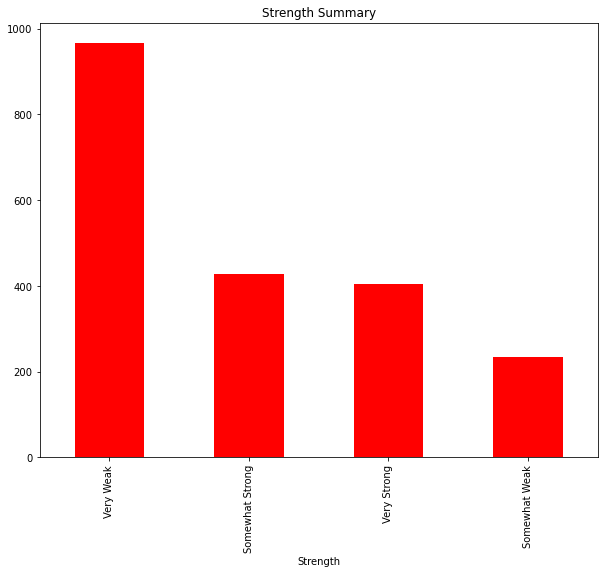

In [58]:
df.fillna('', inplace=True)
ax = df['Strength Summary'].value_counts().plot(kind='bar',
                                    figsize=(10,8),
                                    title="Strength Summary",
                                    color = 'red')
#ax = df['Strength Summary'].value_counts().plot(color = 'blue')
ax.set_xlabel("Strength")

### Excel Formatting

In [59]:
df.to_excel("output.xlsx", sheet_name='Strength index', index= False)